# PA 1: Exploratory Analysis over Federal Emergencies and Disasters

## Dataset Details

In this assignment, you will work on 63 years of Federal Disasters dataset. Specifically, you will work on database.csv file from kaggle repository (https://www.kaggle.com/fema/federal-disasters). The file database.csv contains 46,184 rows and 14 columns. This dataset begins with the year 1953, and runs up to the year 2017. Each row corresponds to an emergency declared by the president due to a natural disaster all around the US. The columns of the data-set are:
- Declaration Number - Unique number for each emergency declared
- Declaration Type - Type of declaration
- Declaration Date - Date of declaration
- State - State affected
- County - County affected
- Disaster Type 
- Disaster Title
- Start Date - The date event started
- End Date - The date event ended
- Close Date - End of Declaration
- Individual Assistance Program - Whether IAP was provided or not?
- Individuals & Households Program - Whether IHP was provided or not?
- Public Assistance Program - Whether PAP was provided or not?
- Hazard Mitigation Program - Whether HMP was provided or not?


In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Federal Emergencies and Disasters dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [4]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('database.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,5/2/1953,GA,NaN,Tornado,Tornado,5/2/1953,5/2/1953,6/1/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,5/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,5/15/1953,5/15/1953,1/1/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,5/29/1953,LA,NaN,Flood,Flood,5/29/1953,5/29/1953,2/1/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,6/2/1953,MI,NaN,Tornado,Tornado,6/2/1953,6/2/1953,2/1/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,6/6/1953,MT,NaN,Flood,Floods,6/6/1953,6/6/1953,12/1/1955,Yes,No,Yes,Yes


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [5]:

print (">>Task 1-a: Details of df_data data frame are: \n", df_data.shape ) 


num_rows = len(df_data)
num_cols = len(df_data.columns)
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 



print ("\n\n>>Task 1-c: Descriptive details of 'Start Date' column are\n",df_data['Start Date'].describe())


num_tot_years  = df_data['Disaster Title'].unique()
num_uniq_county = df_data['County'].unique()

print ("\n\n >>Task 1-d:")
print(num_tot_years)
print("#####################################################")
print(num_uniq_county) 



>>Task 1-a: Details of df_data data frame are: 
 (46185, 14)


>>Task 1-b: Number of rows:46185 and number of columns:14


>>Task 1-c: Descriptive details of 'Start Date' column are
 count         46185
unique         2324
top       8/29/2005
freq           2764
Name: Start Date, dtype: object


 >>Task 1-d:
['Tornado' 'Tornado and Heavy Rainfall' 'Flood' ... 'Hurricane Matthew'
 'Severe Stotms and Flooding'
 'Potential Failure of the Emergency Spillway at Oroville Lake']
#####################################################
[nan 'Clay County' 'Alpine County' ... 'Coeur dAlene Indian Reservation'
 'Aleutians West Census Area' 'Bad River Indian Reservation']


# Task 2: Aggregation & Filtering & Rank


In [6]:

df_data['Start Date']= pd.to_datetime(df_data['Start Date'])
df_data['End Date']= pd.to_datetime(df_data['End Date'])
emergency_data = df_data[df_data['Declaration Type'] == "Emergency"]

Emergency_greater_120 = emergency_data[(emergency_data["End Date"] -emergency_data["Start Date"]).dt.days.abs()>120]['Disaster Title'].unique()
print (">>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are %s \n\n\n" 
       % (Emergency_greater_120))

df_data['Declaration Date'] = pd.to_datetime(df_data['Declaration Date'])
mask = (df_data['Declaration Date'] > pd.to_datetime('01-01-1998') ) & (df_data['Declaration Date'] < pd.to_datetime('31-12-1999'))
1
df_num_declarations_1998=df_data.loc[mask]
print(df_num_declarations_1998.columns)
num_declarations_1998 = df_num_declarations_1998[df_num_declarations_1998["Individual Assistance Program"]=="Yes"]
num_declarations_1998_texas_texas=len(num_declarations_1998[num_declarations_1998["State"]=="TX"])

print ("\n>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were %s\n\n" 
       % (num_declarations_1998_texas_texas))


n = 10
top10_disasters=df_data[df_data["Declaration Type"]=="Disaster"]['County'].value_counts().index[:n]
top10_emergencies=df_data[df_data["Declaration Type"]=="Emergency"]['County'].value_counts().index[:n]

print ("\n\n>>Task 2-c: top 10 counties with the most disasters for all years are: \n%s" % (top10_disasters))
print ("\n\n>>Task 2-c: top 10 counties with the most emergencies for all years are: \n%s" % (top10_emergencies))


>>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are ['Extreme  Fire Hazard' 'Fire' 'Extreme Fire Hazards' 'West Nile Virus'
 'Drought' 'Wildfires'] 



Index(['Declaration Number', 'Declaration Type', 'Declaration Date', 'State',
       'County', 'Disaster Type', 'Disaster Title', 'Start Date', 'End Date',
       'Close Date', 'Individual Assistance Program',
       'Individuals & Households Program', 'Public Assistance Program',
       'Hazard Mitigation Program'],
      dtype='object')

>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were 322




>>Task 2-c: top 10 counties with the most disasters for all years are: 
Index(['Washington County', 'Jefferson County', 'Jackson County',
       'Franklin County', 'Lincoln County', 'Clay County', 'Madison County',
       'Montgomery County', 'Monroe County', 'Marion County'],
      dtype='object')


>>Task 2-c: top 10 counties with the most emergencies for all years are

# Task 3: Visualization


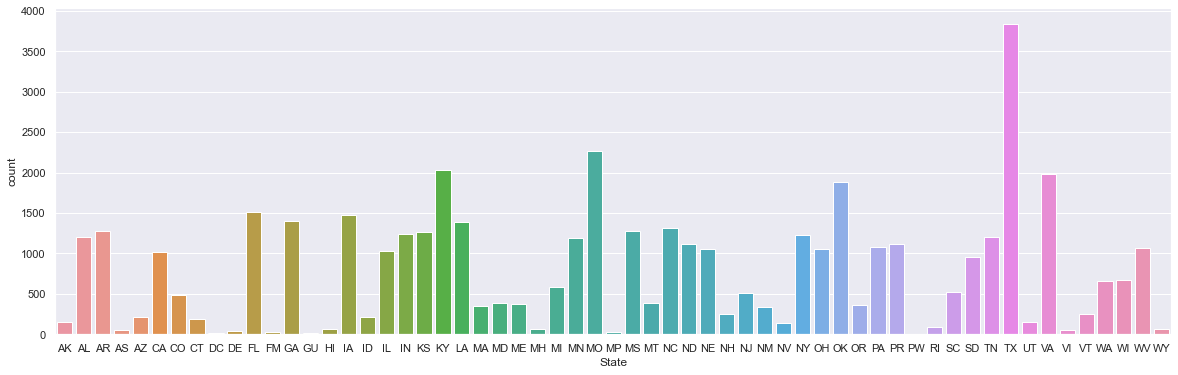

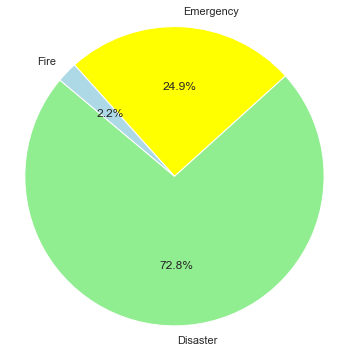

In [7]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)


sns.set()
plt.figure(figsize=(20,6))
declaration_data = df_data.groupby('State')["Declaration Number"].count().reset_index(name='count');
ax = sns.barplot(x="State", y="count", data=declaration_data, dodge=False)


labels = df_data['Declaration Type'].unique()
sizes = df_data.groupby('Declaration Type').size().array
colors = [ 'lightgreen', 'Yellow', 'lightblue']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()


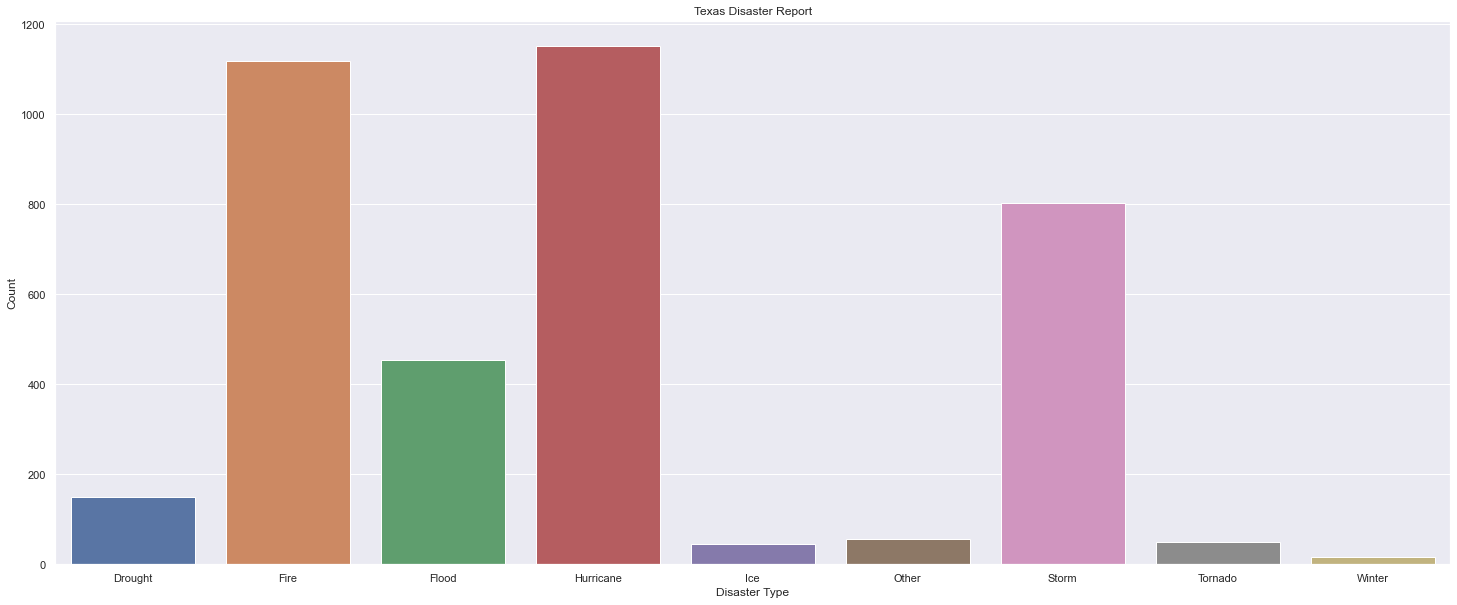

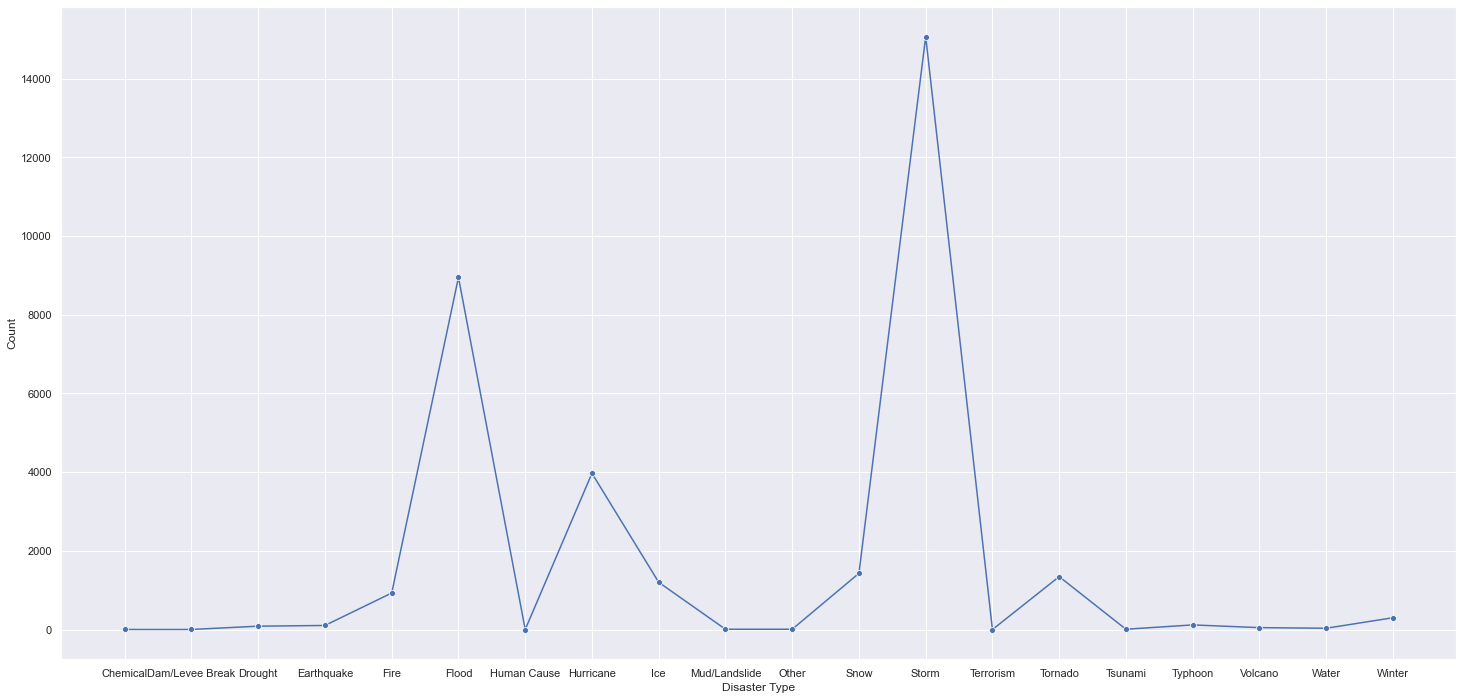

In [11]:
 
sns.set()
plt.figure(figsize=(25,10))
declaration_data = df_data[(df_data['State'] == 'TX')].groupby('Disaster Type').size().reset_index(name='Count')
ax = sns.barplot(x="Disaster Type", y="Count", data=declaration_data, dodge=False).set_title("Texas Disaster Report")

sns.set()
plt.figure(figsize=(25,12))
result = df_data[(df_data['Declaration Type'] == 'Disaster')].groupby('Disaster Type').size().reset_index(name='Count')
ax =sns.lineplot(x="Disaster Type", y='Count', data=result, marker="o")
plt.show()


a. From the task 3 we know that the disaster was 72.8% of all the hazards that occurred for the period 64 years. 
So I need to simply group and envision the disaster type. From the diagram create, we realize that Storm was 
the most occurring followed by flood related disasters. We can likewise comprehend that the chemical, water,
human cause, terrorism dam/levee, mud/lanslide has the least probability(nearly zero).

b. We likewise realize that Texas is the state where generally number of danger occurred in the given time-period, 
the subsequent diagram depicts the frequencies of various disasters that occurred in Texas state.